In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
us = gpd.read_file("Data/County_shp_2018/County_shp_2018.shp")
us = us.to_crs('ESRI:102008')
state = us.dissolve(by='STATEFP')

In [3]:
re = pd.read_csv("MLM model/re.csv")
fe = pd.read_csv("MLM model/fe.csv")
re.iloc[:,1:] = re.iloc[:,1:] + fe['x'].values

In [4]:
re.columns

Index(['Unnamed: 0', '(Intercept)', 'sex_ratio', 'pct_black', 'pct_hisp',
       'pct_bach', 'median_income', 'pct_65_over', 'pct_age_18_29', 'gini',
       'pct_manuf', 'ln_pop_den', 'pct_3rd_party', 'turn_out', 'pct_fb',
       'pct_uninsured'],
      dtype='object')

In [5]:
re.iloc[:,1].shape

(49,)

In [6]:
re.iloc[:,1].shape

(49,)

In [7]:
state.shape

(49, 10)

In [8]:
from matplotlib import cm,colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm,colors

def plot(j,co=''):
    cmap = np.vstack([cm.get_cmap("bwr_r")(np.linspace(0,0.4,8)),
                 cm.get_cmap("bwr_r")(np.linspace(0.6,1,8))])

    cmap = mpl.colors.ListedColormap(cmap)
    
    ax = state.plot(column=re.iloc[:,j].values,vmin=-1,vmax=1,figsize=(12,12),cmap=cmap,
                  linewidth=0.5,edgecolor='black')

    plt.axis('off')
    plt.title(co,fontsize=15,)
    
    norm = mpl.colors.Normalize(vmin=-1, vmax=1)
    fig = ax.get_figure()
    cax = fig.add_axes([0.95, 0.3, 0.025, 0.4])
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
    # fake up the array of the scalar mappable. Urgh...
    sm._A = []
    fig.colorbar(sm, cax=cax)
    
    plt.savefig('MLM Maps/mlm_election_20_' + co + '.png',dpi=600,bbox_inches='tight')

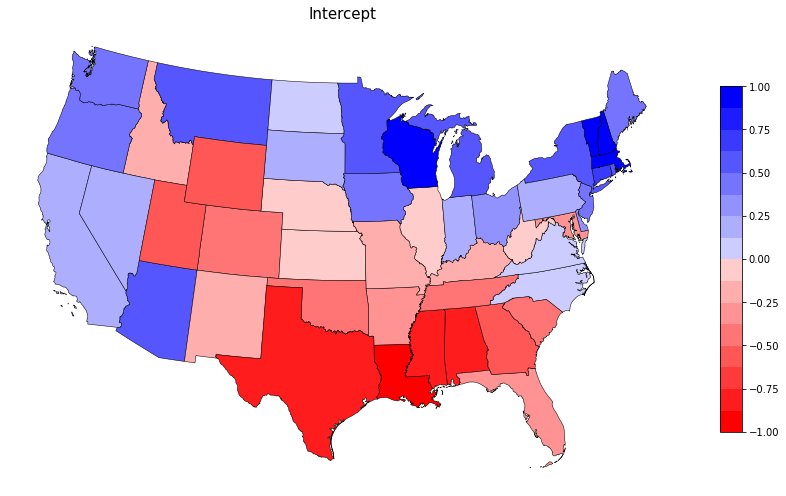

In [9]:
plot(1,'Intercept')

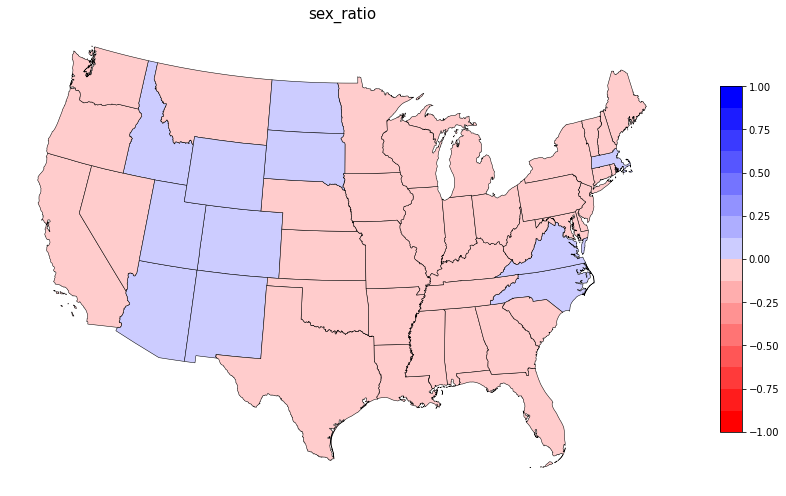

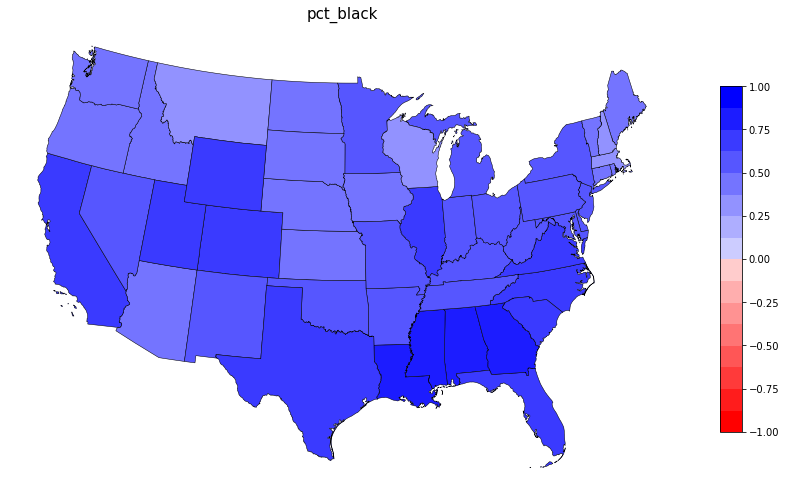

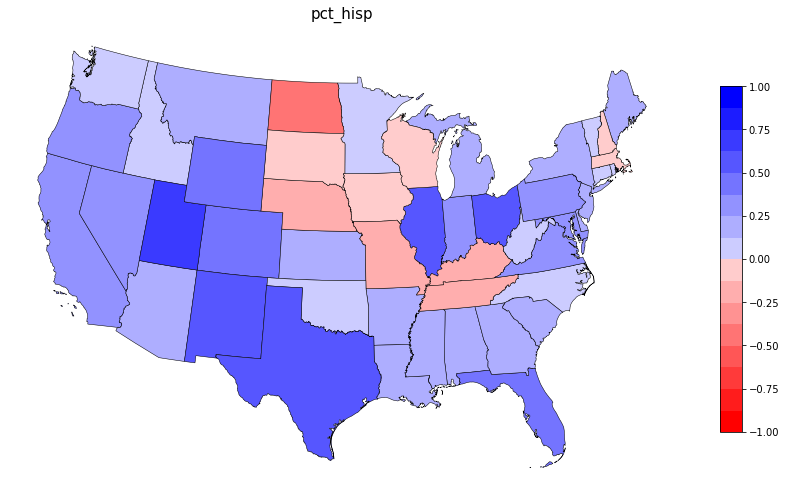

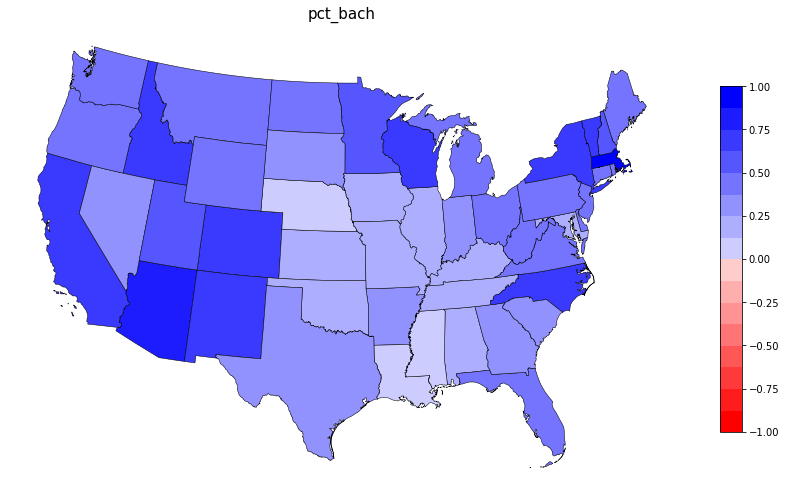

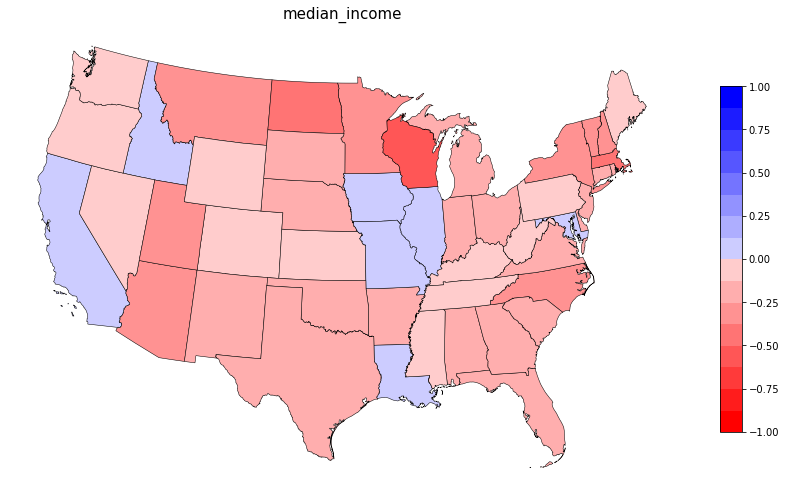

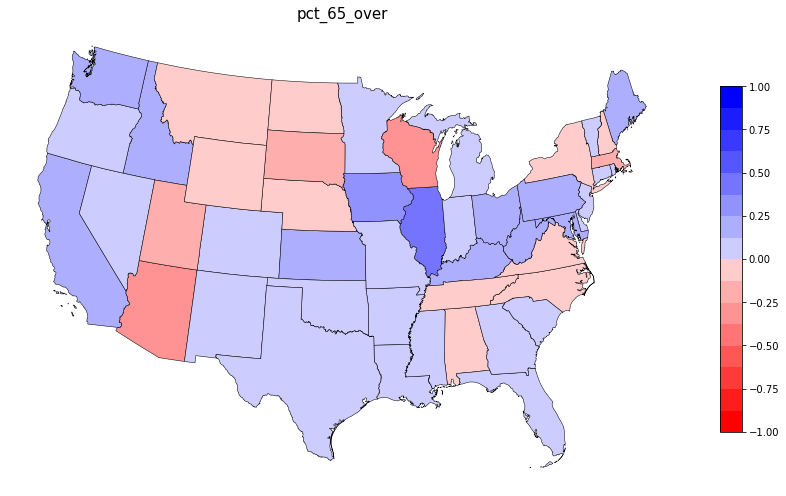

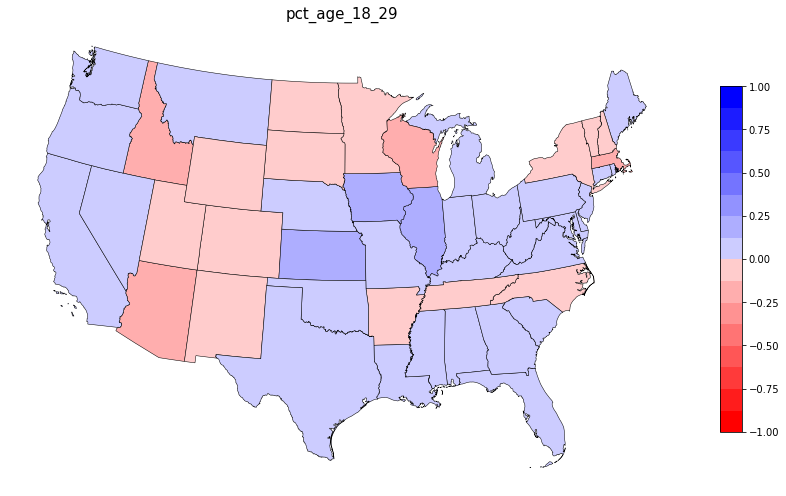

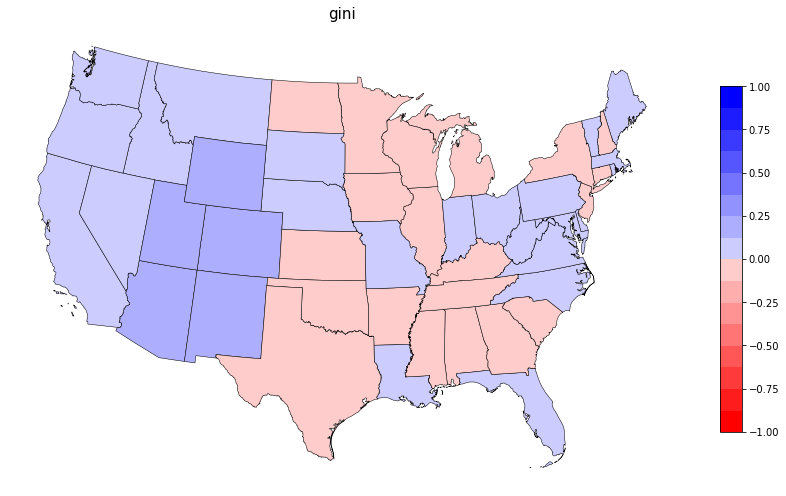

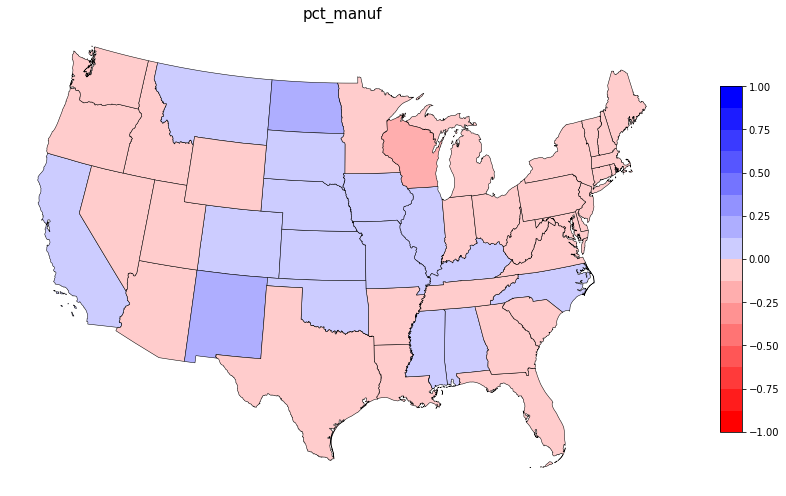

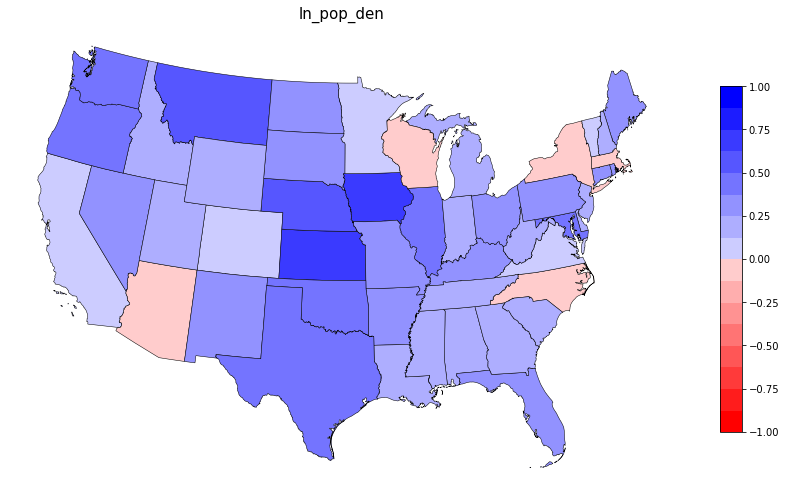

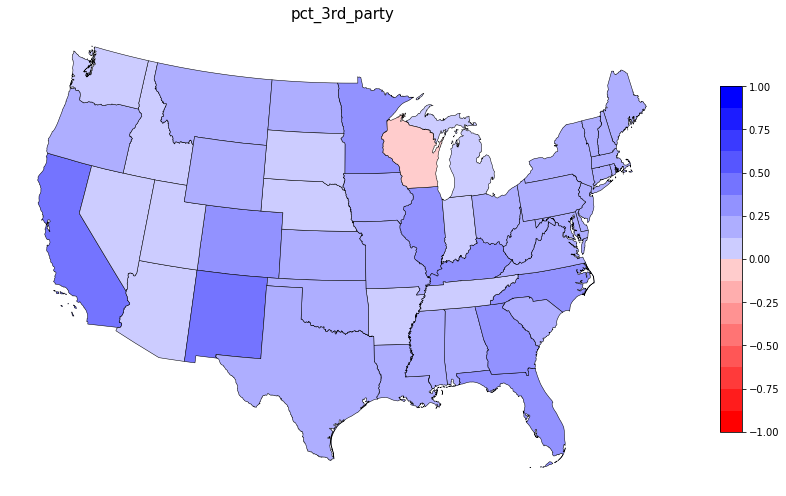

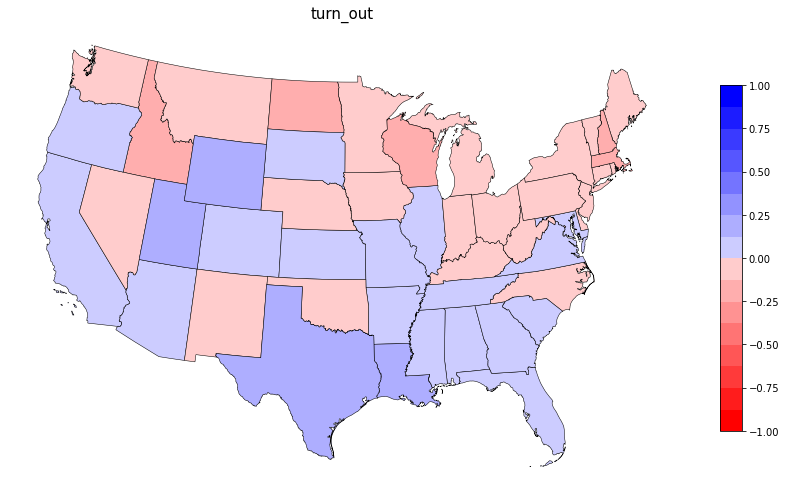

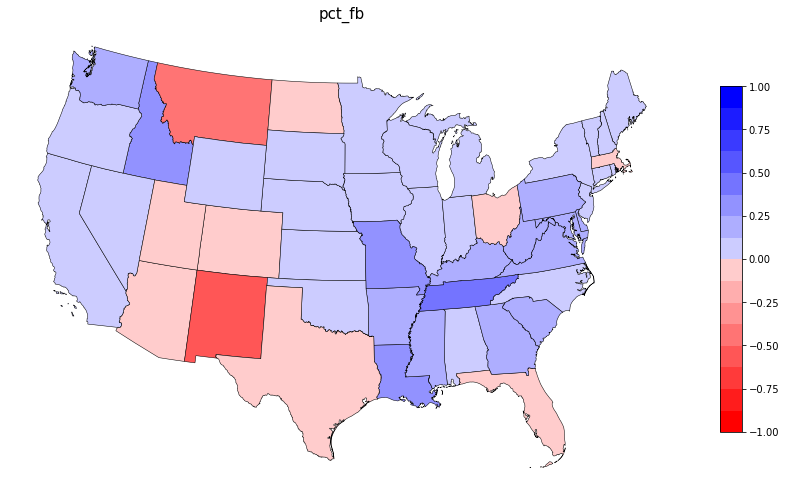

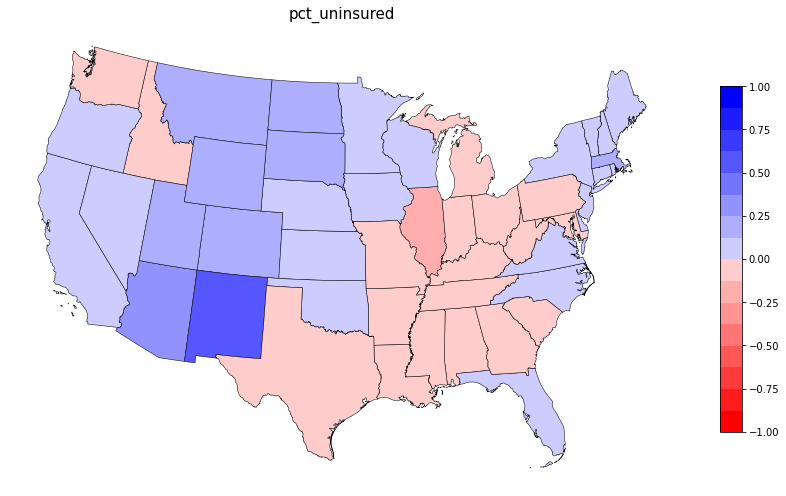

In [10]:
for j in range(16):
    if j >=2:
        plot(j,re.columns[j])